## Analysis of Urban Park Ranger Animal Condition Responses

### Importing the data

In [1]:
import pandas as pd
import numpy as np

I initially tried to match this with another dataset, but couldn't determine how to do so (a 311 number didn't match a unique key in that dataset). 

### Call in the ranger requests

In [2]:
df =pd.read_csv("Urban_Park_Ranger_Animal_Condition_Response_20250618.csv",na_values=['','****', 'N/A', 'n/a', 'None', 'none', 'Varies', '?', '-', 'NA', 'NaN', 'Does not apply'])

In [3]:
df.head()

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,311SR Number,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number
0,06/23/2021 04:45:00 PM,06/24/2021 08:00:00 AM,Brooklyn,Sternberg Park,Inside locked athletic field under construction,Chukar,Other,Exotic,Healthy,6.00,...,311-06712416,ACC,6.0,False,False,NaN,NaN,False,False,163537
1,06/24/2021 10:00:00 AM,06/24/2021 11:00:00 AM,Bronx,Haffen Park,Haffen Pool,Sparrow,Central,Native,Healthy,1.75,...,311-06714879,Rehabilitator,4.0,False,False,NaN,NaN,False,False,NaN
2,06/23/2021 02:30:00 PM,06/23/2021 02:30:00 PM,Bronx,Pelham Bay Park,Pelham Bay South,White-tailed Deer,Employee,Native,NaN,1.00,...,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
3,06/23/2021 01:00:00 PM,06/23/2021 01:10:00 PM,Staten Island,Willowbrook Park,The carousel,Raccoon,Employee,Native,NaN,2.00,...,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
4,06/23/2021 09:20:00 AM,06/23/2021 09:20:00 AM,Queens,Judge Moses Weinstein Playground,Garbage can,Virginia Opossum,Central,Native,Healthy,2.25,...,311-06699415,ACC,1.0,False,False,NaN,NaN,False,False,119833


of these columns i think i only really care about date and time of initial call, borough, property, location, species description, animal condition, 311 sr number (to merge dataframes), number of animals, maybe final ranger action

In [4]:
df.shape

(6385, 22)

## Eliminate unnecessary columns

In [5]:
df.drop(columns=['Date and time of Ranger response', 'Call Source',  'Duration of Response', 'Age',
       'PEP Response', 'Animal Monitored', 'Rehabilitator',
       'Hours spent monitoring', 'Police Response', 'ESU Response', '311SR Number',
       'ACC Intake Number'], inplace=True)

In [6]:
df.shape

(6385, 10)

Another organizational note - let's pull out the year it so we can sort by year and see how many animals were seen in different years.

In [7]:
df['Date and Time of initial call'] = pd.to_datetime(df['Date and Time of initial call'])

/var/folders/nd/r_m5lr614ms2xy6xqnbb6nyh0000gn/T/ipykernel_24012/178530572.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date and Time of initial call'] = pd.to_datetime(df['Date and Time of initial call'])


In [8]:
df['Year'] =df['Date and Time of initial call'].dt.year

### Cleaning and getting more columns correctly situating

Because the location data is very nonspecific (location descriptors like "near the field" or "by the garbage can"), I'm going to use the
the data we do have to attempt to geocode the sightings. This is imprecise because we don't have coordinates here, just the NYC Parks Property and the borough of NYC.

first, combining property and borough information to easily feed into geocoder and have in the spreadsheet

In [9]:
df['full_address'] = (
    df['Property'].fillna('') + ', ' +
    df['Borough'].fillna('') + ', NY'
)

I also noticed there was a lot of repetition and duplicates in the species name, so I want to standardize those to effectively sort.

In [10]:
df['Species Description'] = df['Species Description'].str.lower().str.strip()

In [11]:
df.to_csv('animals_cleaned.csv', index=False)

In [12]:
df.head()

,Date and Time of initial call,Borough,Property,Location,Species Description,Species Status,Animal Condition,Animal Class,Final Ranger Action,# of Animals,Year,full_address
0,2021-06-23 16:45:00,Brooklyn,Sternberg Park,Inside locked athletic field under construction,chukar,Exotic,Healthy,Birds,ACC,6.0,2021,"Sternberg Park, Brooklyn, NY"
1,2021-06-24 10:00:00,Bronx,Haffen Park,Haffen Pool,sparrow,Native,Healthy,Birds,Rehabilitator,4.0,2021,"Haffen Park, Bronx, NY"
2,2021-06-23 14:30:00,Bronx,Pelham Bay Park,Pelham Bay South,white-tailed deer,Native,NaN,Deer,Unfounded,0.0,2021,"Pelham Bay Park, Bronx, NY"
3,2021-06-23 13:00:00,Staten Island,Willowbrook Park,The carousel,raccoon,Native,NaN,Small Mammals-RVS,Unfounded,0.0,2021,"Willowbrook Park, Staten Island, NY"
4,2021-06-23 09:20:00,Queens,Judge Moses Weinstein Playground,Garbage can,virginia opossum,Native,Healthy,Small Mammals-non RVS,ACC,1.0,2021,"Judge Moses Weinstein Playground, Queens, NY"


In [13]:
df.to_csv("animals_with_locations.csv", index=False)

### My question: what specific animal was most frequently reported during this time period?

One issue here is you need to do the count of all the animals, not just counting the rows.

In [14]:
df['# of Animals'].sum()

np.float64(8397.0)

I want to create a bar chart of each of the species and how many were reported. But for some species, none were reported. To make sure we don't have a bunch of zeroes, I want to remove the zeroes from the chart before I visualize.

In [15]:
species_with_animals = df.groupby('Species Description')['# of Animals'].sum()
species_with_animals = species_with_animals.reset_index()

In [16]:
species_with_animals.columns

Index(['Species Description', '# of Animals'], dtype='object')

In [17]:
valid_species = species_with_animals[species_with_animals['# of Animals'] > 0]

valid_species = valid_species.sort_values(by='# of Animals',ascending=False)
print(valid_species)

          Species Description  # of Animals
252                   raccoon        1306.0
18          atlantic menhaden        1075.0
54               canada goose         443.0
52           bullhead catfish         300.0
201              mallard duck         299.0
..                        ...           ...
180     hummingbird (unknown)           1.0
181            humpback whale           1.0
182          iguana (unknown)           1.0
185  kemp's ridley sea turtle           1.0
340     yellow-rumped warbler           1.0

[311 rows x 2 columns]


In [18]:
valid_species.to_csv("valid_species.csv",index=False)

### what borough has the most animals?

<Axes: ylabel='Borough'>

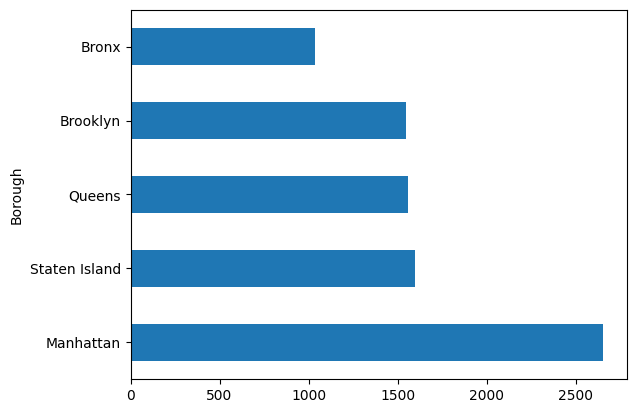

In [19]:
boros= df.groupby('Borough')['# of Animals'].sum().sort_values(ascending=False)
boros.plot(kind='barh')

### what specific location had the most animals sighted?

In [20]:
properties = df.groupby('Property')['# of Animals'].sum().sort_values(ascending=False).head(20)

only doing the top 20 here so the chart isn't crazy long

In [21]:
properties.to_csv('properties.csv',index=True)

In [22]:
df.head()

,Date and Time of initial call,Borough,Property,Location,Species Description,Species Status,Animal Condition,Animal Class,Final Ranger Action,# of Animals,Year,full_address
0,2021-06-23 16:45:00,Brooklyn,Sternberg Park,Inside locked athletic field under construction,chukar,Exotic,Healthy,Birds,ACC,6.0,2021,"Sternberg Park, Brooklyn, NY"
1,2021-06-24 10:00:00,Bronx,Haffen Park,Haffen Pool,sparrow,Native,Healthy,Birds,Rehabilitator,4.0,2021,"Haffen Park, Bronx, NY"
2,2021-06-23 14:30:00,Bronx,Pelham Bay Park,Pelham Bay South,white-tailed deer,Native,NaN,Deer,Unfounded,0.0,2021,"Pelham Bay Park, Bronx, NY"
3,2021-06-23 13:00:00,Staten Island,Willowbrook Park,The carousel,raccoon,Native,NaN,Small Mammals-RVS,Unfounded,0.0,2021,"Willowbrook Park, Staten Island, NY"
4,2021-06-23 09:20:00,Queens,Judge Moses Weinstein Playground,Garbage can,virginia opossum,Native,Healthy,Small Mammals-non RVS,ACC,1.0,2021,"Judge Moses Weinstein Playground, Queens, NY"


### Let's look at deer specifically. create variable called deer

In [28]:
deer = df[df['Species Description'] == 'white-tailed deer']
#deer.groupby('Property')['# of Animals'].sum().sort_values(ascending=False).head(10)
deer.to_csv("deer.csv", index=True)

In [30]:
deer.head(20)

,Date and Time of initial call,Borough,Property,Location,Species Description,Species Status,Animal Condition,Animal Class,Final Ranger Action,# of Animals,Year,full_address
2,2021-06-23 14:30:00,Bronx,Pelham Bay Park,Pelham Bay South,white-tailed deer,Native,NaN,Deer,Unfounded,0.0,2021,"Pelham Bay Park, Bronx, NY"
124,2021-05-24 10:00:00,Staten Island,Conference House Park,"Next to sidewalk along Statterlee St., between...",white-tailed deer,Native,DOA,Deer,Advised/Educated others,1.0,2021,"Conference House Park, Staten Island, NY"
146,2021-05-19 16:30:00,Bronx,Pelham Bay Park,Turtle Cove,white-tailed deer,Native,Injured,Deer,Unfounded,0.0,2021,"Pelham Bay Park, Bronx, NY"
325,2021-03-18 11:30:00,Bronx,Pelham Bay Park,Pelham Bay Park West & Ropes Avenue,white-tailed deer,Native,DOA,Deer,Advised/Educated others,1.0,2021,"Pelham Bay Park, Bronx, NY"
326,2021-03-18 11:30:00,Bronx,Pelham Bay Park,Pelham Bay Park West & Ropes Avenue,white-tailed deer,Native,Injured,Deer,Monitored Animal,1.0,2021,"Pelham Bay Park, Bronx, NY"
333,2021-03-11 09:30:00,Staten Island,Clove Lakes Park,In woods behind Ice Skating Rink,white-tailed deer,Native,DOA,Deer,Relocated/Condition Corrected,1.0,2021,"Clove Lakes Park, Staten Island, NY"
339,2021-03-09 09:10:00,Staten Island,Greenbelt White trail,Ashworth Ave. and Lovell Ave.,white-tailed deer,Native,Injured,Deer,Unfounded,0.0,2021,"Greenbelt White trail, Staten Island, NY"
341,2021-03-07 09:00:00,Staten Island,Joseph Manna Park,In shrubs,white-tailed deer,Native,DOA,Deer,Advised/Educated others,1.0,2021,"Joseph Manna Park, Staten Island, NY"
345,2021-03-04 17:00:00,Bronx,Pelham Bay Park,Twin Island Shoreline,white-tailed deer,Native,DOA,Deer,Relocated/Condition Corrected,1.0,2021,"Pelham Bay Park, Bronx, NY"
351,2021-03-03 09:00:00,Staten Island,William T. Davis Wildlife Refuge,Behind the Parks house at 2226 Richmond Ave,white-tailed deer,Native,Injured,Deer,Advised/Educated others,1.0,2021,"William T. Davis Wildlife Refuge, Staten Islan..."


where did people see the deer?

Trying to geocode all the animals this way didn't work - it hit a limit at 900. So for now, I'm just doing deer (which is what I'm interested in anyway).

In [31]:
import geocoder

!pip install geopy
from geopy.geocoders import Nominatim
from time import sleep
deer = pd.read_csv('deer.csv')
geolocator = Nominatim(user_agent="ananya-geopy-lookup")

In [46]:
def geocode_address(address):
    try:
        location = geolocator.geocode(address)
        sleep(1)  # Respectful delay to avoid rate limiting
        return location
    except:
        return None
# Geocode each address
deer['location'] = deer['full_address'].apply(geocode_address)
# Now extract latitude and longitude
deer['latitude'] = deer['location'].apply(lambda loc: loc.latitude if loc else None)
deer['longitude'] = deer['location'].apply(lambda loc: loc.longitude if loc else None)
deer = deer.drop(columns='location')  # Remove location column
deer_cleaned = deer

In [47]:
deer_cleaned.head()

,Unnamed: 0,Date and Time of initial call,Borough,Property,Location,Species Description,Species Status,Animal Condition,Animal Class,Final Ranger Action,# of Animals,Year,full_address,latitude,longitude
1,124,2021-05-24 10:00:00,Staten Island,Conference House Park,"Next to sidewalk along Statterlee St., between...",white-tailed deer,Native,DOA,Deer,Advised/Educated others,1.0,2021,"Conference House Park, Staten Island, NY",40.501545,-74.251830
3,325,2021-03-18 11:30:00,Bronx,Pelham Bay Park,Pelham Bay Park West & Ropes Avenue,white-tailed deer,Native,DOA,Deer,Advised/Educated others,1.0,2021,"Pelham Bay Park, Bronx, NY",40.852548,-73.827938
4,326,2021-03-18 11:30:00,Bronx,Pelham Bay Park,Pelham Bay Park West & Ropes Avenue,white-tailed deer,Native,Injured,Deer,Monitored Animal,1.0,2021,"Pelham Bay Park, Bronx, NY",40.852548,-73.827938
5,333,2021-03-11 09:30:00,Staten Island,Clove Lakes Park,In woods behind Ice Skating Rink,white-tailed deer,Native,DOA,Deer,Relocated/Condition Corrected,1.0,2021,"Clove Lakes Park, Staten Island, NY",40.618708,-74.112755
7,341,2021-03-07 09:00:00,Staten Island,Joseph Manna Park,In shrubs,white-tailed deer,Native,DOA,Deer,Advised/Educated others,1.0,2021,"Joseph Manna Park, Staten Island, NY",40.625787,-74.176887


Now, seeing how many deer were reported in each year of the data.

<Axes: ylabel='Year'>

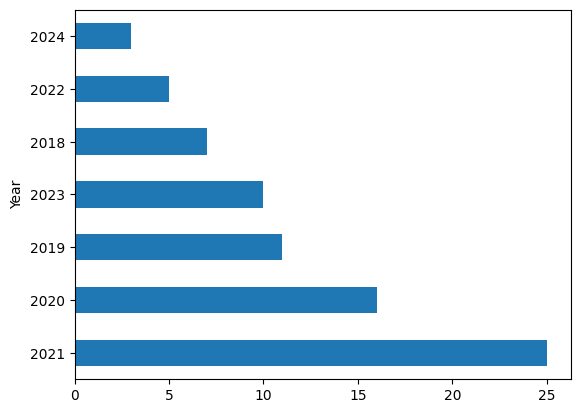

In [48]:
deer_cleaned.groupby('Year')['# of Animals'].sum().sort_values(ascending=False).plot(kind='barh')

In [49]:
deer_cleaned.to_csv("deer_cleaned.csv", index=True)

Where did they see ALL these deer in 2021?

In [50]:
deer_cleaned[deer_cleaned['Year'] == 2021].groupby('Property')['# of Animals'].sum().sort_values(ascending=False).head(10)

Property
Pelham Bay Park                  9.0
Blue Heron Park                  3.0
Brookfield Park                  2.0
Clove Lakes Park                 2.0
Van Cortlandt Park               2.0
Conference House Park            1.0
Freshkills Park                  1.0
Joseph Manna Park                1.0
LaTourette Park & Golf Course    1.0
South Shore Country Club         1.0
Name: # of Animals, dtype: float64

I also wanna sort by animal classes (mammal, etc)

In [51]:
df.groupby('Animal Class')['# of Animals'].sum().sort_values(ascending=False).head(20)

Animal Class
Birds                                   1775.0
Fish-numerous quantity                  1373.0
Small Mammals-RVS                       1160.0
Domestic                                 750.0
["Birds"]                                533.0
Small Mammals-non RVS                    446.0
Terrestrial Reptile or Amphibian         364.0
Raptors                                  288.0
["Small Mammals-RVS"]                    285.0
["Domestic"]                             211.0
Rare,  Endangered,  Dangerous            114.0
["Rare, Endangered, Dangerous"]          107.0
["Small Mammals-non RVS"]                102.0
["Fish-numerous quantity"]               101.0
Domestic;#Birds                           91.0
Non Native Fish-(invasive)                90.0
["Terrestrial Reptile or Amphibian"]      87.0
Domestic, Birds                           74.0
Deer                                      68.0
["Domestic","Birds"]                      62.0
Name: # of Animals, dtype: float64

these are pretty messy. let's try to clean up htese categories. 

In [52]:
df['Animal Class Clean'] = (
    df['Animal Class']
    .astype(str)
    .str.replace(r'[\[\]"]', '', regex=True)
)

In [53]:
df['Animal Class Clean'] = df['Animal Class Clean'].str.replace(r'[;#]', ',', regex=True)

In [54]:
df.groupby('Animal Class Clean')['# of Animals'].sum().sort_values(ascending=False)

Animal Class Clean
Birds                                                       2308.0
Fish-numerous quantity                                      1474.0
Small Mammals-RVS                                           1445.0
Domestic                                                     961.0
Small Mammals-non RVS                                        548.0
Terrestrial Reptile or Amphibian                             451.0
Raptors                                                      323.0
Rare,  Endangered,  Dangerous                                114.0
Rare, Endangered, Dangerous                                  107.0
Domestic,,Birds                                               91.0
Non Native Fish-(invasive)                                    91.0
Deer                                                          79.0
Domestic, Birds                                               74.0
Domestic,Birds                                                62.0
Birds, Domestic                            

what year did people report the most animals overall?

In [55]:
df.groupby('Year')['# of Animals'].sum().sort_values(ascending=False).head(10)

Year
2023    1966.0
2020    1774.0
2022    1295.0
2021    1223.0
2019     831.0
2024     693.0
2018     615.0
Name: # of Animals, dtype: float64

In [56]:
df.groupby('Year')['# of Animals'].sum().head(10)

Year
2018     615.0
2019     831.0
2020    1774.0
2021    1223.0
2022    1295.0
2023    1966.0
2024     693.0
Name: # of Animals, dtype: float64

how many animals were dead etc

In [60]:
df.groupby('Animal Condition')['# of Animals'].sum().head(10)

Animal Condition
DOA          1893.0
Healthy      3614.0
Injured      1222.0
Unhealthy    1446.0
Name: # of Animals, dtype: float64

In [62]:
df.groupby('Species Description')['# of Animals'].sum().head(10)

Species Description
alligator snapping turtle                          1.0
american alligator                                 3.0
american bittern                                   3.0
american black duck                                1.0
american black duck/mallard (hybrid)               1.0
american bullfrog                                 58.0
american bullfrog and florida softshell turtle    42.0
american coot                                      3.0
american crow                                     14.0
american goldfinch                                 1.0
Name: # of Animals, dtype: float64

In [ ]:
df.groupby('Boroughs')['# of Animals'].sum().head(10)

In [67]:
top_animals = (
    df.groupby(['Borough', 'Species Description'])['# of Animals']
    .sum()
    .reset_index()
    .sort_values(['Borough', '# of Animals'], ascending=[True, False])
    .drop_duplicates('Borough')
)

In [68]:
top_animals.to_csv("top_animals.csv", index=True)